# Part 1
Loading the digits dataset:

In [2]:
from sklearn.datasets import load_digits
import pandas as pd
from pandas import DataFrame
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

digits_set = load_digits()
data = digits_set.data
target = digits_set.target
digits_df = DataFrame(data=digits_set.data, columns=digits_set.feature_names)
digits_df['digit'] = target

Data:

In [3]:
display(digits_df)
samples, features = digits_df.shape
print(f'This dataset contatins {features} features and {samples} samples.')
print(f"Range of values: [{np.min(data)}, {np.max(data)}]")
print(f"Scale of values: {np.max(data)}")
print(f"Variance: {np.var(data)}")

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,digit
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9


This dataset contatins 65 features and 1797 samples.
Range of values: [0.0, 16.0]
Scale of values: 16.0
Variance: 36.20173240585726


### Wild Guess
It seems like all the data may be integers. Let's check our assumption:

In [4]:
all_integers = np.any(np.mod(data, 1) == 0)
print(f"Our theory is {all_integers}!")

Our theory is True!


We'll use this to our benefit and create an integers dataframe:

In [5]:
digits_df_int = digits_df.astype('Int64')

## Basic Analysis:
- The features names go by 'pixel_i_j' where 0 <= i, j <= 7. 
- This may hint the data represents a 8 x 8 matrix, where each field contains information about it's corresponding pixel.
- All the samples being integers might mean they could correspond to enumerations. As the features named after pixels, we can assume those samples are each pixel's colour.

Let's split our data:

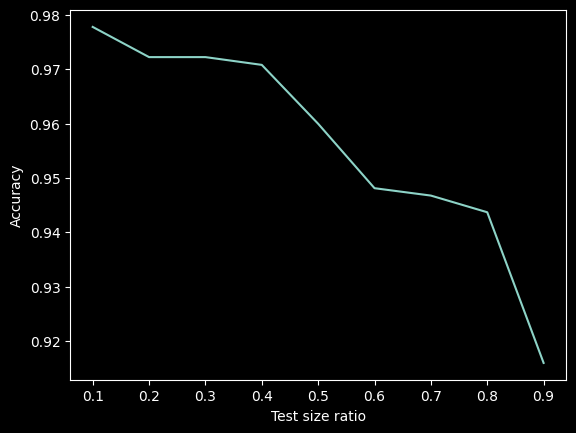

In [6]:
accuracies = []
ratios = np.array([i/10 for i in range(1, 10)])


for r in ratios:
    X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=r, random_state=42)
    clf = LogisticRegression(max_iter=5000)
    clf.fit(X_train, y_train)
    accuracy = clf.score(X_test, y_test)
    accuracies.append(accuracy)

plt.style.use('dark_background')
plt.plot(ratios, accuracies)
plt.xlabel("Test size ratio")
plt.ylabel("Accuracy")
plt.show()

In [7]:
digits_df_int.drop_duplicates(ignore_index=True)

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,digit
0,0,0,5,13,9,1,0,0,0,0,...,0,0,0,6,13,10,0,0,0,0
1,0,0,0,12,13,5,0,0,0,0,...,0,0,0,0,11,16,10,0,0,1
2,0,0,0,4,15,12,0,0,0,0,...,0,0,0,0,3,11,16,9,0,2
3,0,0,7,15,13,1,0,0,0,8,...,0,0,0,7,13,13,9,0,0,3
4,0,0,0,1,11,0,0,0,0,0,...,0,0,0,0,2,16,4,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0,0,4,10,13,6,0,0,0,1,...,0,0,0,2,14,15,9,0,0,9
1793,0,0,6,16,13,11,1,0,0,0,...,0,0,0,6,16,14,6,0,0,0
1794,0,0,1,11,15,1,0,0,0,0,...,0,0,0,2,9,13,6,0,0,8
1795,0,0,2,10,7,0,0,0,0,0,...,0,0,0,5,12,16,12,0,0,9


###### Q1.3


In [8]:
samples_per_class = [150, 100, 100, 100, 100, 100, 100, 100, 100, 50]

unbalanced_data = []
for label in range(10):
    indices = np.where(digits_set.target == label)[0]
    subset_size = min(samples_per_class[label], len(indices))
    subset_indices = np.random.choice(indices, size=subset_size, replace=False)
    unbalanced_data.extend(digits_set.data[subset_indices])

unbalanced_data = np.array(unbalanced_data)

unbalanced_target = np.zeros(1000, dtype=np.float64)

unbalanced_target[0:150] = target[0]
for i in range(1, 9):
    unbalanced_target[150 + 100*(i-1) : 250 + 100*(i-1)] = target[i]
unbalanced_target[950:1000] = target[9]

unbalanced_df = DataFrame(data=unbalanced_data, columns=digits_set.feature_names)
unbalanced_df['digit'] = unbalanced_target
display(unbalanced_df)

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,digit
0,0.0,0.0,1.0,12.0,12.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,14.0,12.0,2.0,0.0,0.0,0.0
1,0.0,0.0,5.0,12.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,7.0,15.0,12.0,2.0,0.0,0.0,0.0
2,0.0,0.0,5.0,15.0,9.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,15.0,15.0,5.0,0.0,0.0,0.0
3,0.0,0.0,2.0,12.0,15.0,12.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,13.0,14.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,14.0,7.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,10.0,13.0,6.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,4.0,11.0,15.0,15.0,2.0,0.0,1.0,...,0.0,0.0,0.0,0.0,3.0,16.0,2.0,0.0,0.0,9.0
996,0.0,0.0,3.0,14.0,16.0,9.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,4.0,12.0,16.0,10.0,0.0,0.0,9.0
997,0.0,0.0,5.0,13.0,15.0,6.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,7.0,14.0,16.0,11.0,1.0,0.0,9.0
998,0.0,0.0,7.0,12.0,11.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,8.0,12.0,16.0,13.0,2.0,0.0,9.0


Now rebalance:

In [16]:
def count_label(df: pd.DataFrame, label: float):
    return len(df[df['digit'] == label])

def min_label(df: pd.DataFrame):
    lables = df['digit'].drop_duplicates()
    return min(lables, key=lambda label: count_label(df, label))


def is_balanced(df: pd.DataFrame):
    lables = df['digit'].drop_duplicates()
    count = count_label(df, lables[0])
    for label in lables:
        if count_label(df, label) != count:
            return False
    return True
    
rebalanced_df = unbalanced_df.copy()

while not is_balanced(rebalanced_df):
    lables = rebalanced_df['digit'].drop_duplicates()
    m_label = min_label(rebalanced_df)
    new_row = unbalanced_df[unbalanced_df['digit'] == m_label].sample()
    rebalanced_df = pd.concat([rebalanced_df, new_row])
    
display(rebalanced_df)

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,digit
0,0.0,0.0,1.0,12.0,12.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,14.0,12.0,2.0,0.0,0.0,0.0
1,0.0,0.0,5.0,12.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,7.0,15.0,12.0,2.0,0.0,0.0,0.0
2,0.0,0.0,5.0,15.0,9.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,15.0,15.0,5.0,0.0,0.0,0.0
3,0.0,0.0,2.0,12.0,15.0,12.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,13.0,14.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,14.0,7.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,10.0,13.0,6.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
556,0.0,1.0,12.0,13.0,13.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,1.0,13.0,16.0,12.0,5.0,0.0,0.0,5.0
693,0.0,0.0,0.0,9.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,10.0,16.0,12.0,2.0,0.0,6.0
750,0.0,0.0,2.0,13.0,16.0,14.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,15.0,4.0,0.0,0.0,0.0,7.0
939,0.0,0.0,6.0,14.0,13.0,4.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,5.0,16.0,16.0,11.0,0.0,0.0,8.0
